In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
sims_single = pd.read_csv("data/similarities_bsbbert_kelex_only.tsv", sep="\t", decimal=",")
sims_ex = pd.read_csv("data/similarities_ex_bsbbert_kelex_only.tsv", sep="\t", decimal=",")

In [3]:
sims_single

,constr,kelex,sentence,bert_sim,pseudword_sim,bert_euclidean,pseudword_euclidean,bert_manhattan,pseudword_manhattan
0,12,noch,"Dieser hat allerdings weder die Möglichkeit , ...",0.461956,0.360323,21.635761,24.413303,464.258453,539.328247
1,12,weder,"Dieser hat allerdings weder die Möglichkeit , ...",0.502179,0.538331,20.657894,19.764433,445.802704,427.116302
2,12,noch,Das gestrige Ereignis hatte weder verletzte Pe...,0.519009,0.382077,20.280035,23.808695,443.408691,521.236816
3,12,weder,Das gestrige Ereignis hatte weder verletzte Pe...,0.542952,0.576795,19.553635,18.686378,428.858887,412.244507
4,16,Was,Was der Düsseldorfer Telekom-Rivale heute demo...,0.475753,0.513094,21.556656,20.331413,470.149231,449.227783
...,...,...,...,...,...,...,...,...,...
118490,1986,kaum,"Da eine Bestätigung per E-Mail folgte , hatte ...",0.603383,0.606195,17.763920,18.140961,391.240051,402.809570
118491,1986,kaum,Für die Konkurrenz der Deutschen Telekom wird ...,0.568902,0.601501,18.716349,18.421740,408.173187,407.123901
118492,1986,kaum,"Inlandsgespräche waren um 7,9 Prozent billiger...",0.544208,0.570155,19.292879,19.176670,430.966736,423.114502
118493,1986,kaum,Ohne Hightech und neue Ideen hat auch das trad...,0.526219,0.571590,19.777096,19.240250,435.052795,421.499451


In [4]:
sims_ex

,constr,kelex,sentence,bert_sim,pseudword_sim,bert_euclidean,pseudword_euclidean,bert_manhattan,pseudword_manhattan
0,12,noch,"Dieser hat allerdings weder die Möglichkeit , ...",0.672397,0.604221,15.970210,17.209381,345.742432,371.009460
1,12,weder,"Dieser hat allerdings weder die Möglichkeit , ...",0.789388,0.688939,13.143401,15.336145,289.303101,335.904053
2,12,noch,Das gestrige Ereignis hatte weder verletzte Pe...,0.696589,0.646514,15.252437,16.193239,330.826721,348.223328
3,12,weder,Das gestrige Ereignis hatte weder verletzte Pe...,0.791338,0.725160,12.752856,14.243462,277.342163,310.794434
4,15,Welch,Welch ein Image-Gewinn ...,0.809274,0.777963,12.744555,13.723814,282.029724,300.851746
...,...,...,...,...,...,...,...,...,...
123276,1986,kaum,"Da eine Bestätigung per E-Mail folgte , hatte ...",0.758732,0.742238,13.169255,13.537968,290.063995,296.511383
123277,1986,kaum,Für die Konkurrenz der Deutschen Telekom wird ...,0.777920,0.740638,13.004274,13.849252,283.431030,299.790100
123278,1986,kaum,"Inlandsgespräche waren um 7,9 Prozent billiger...",0.762695,0.717565,13.422132,14.412047,291.708008,314.217041
123279,1986,kaum,Ohne Hightech und neue Ideen hat auch das trad...,0.788328,0.739672,12.971422,14.082074,287.723358,312.100952


In [5]:
sims_single["sim_diff"] = sims_single.apply(lambda row: (row["pseudword_sim"] - row["bert_sim"])/row["bert_sim"], axis=1)
sims_ex["sim_diff"] = sims_ex.apply(lambda row: (row["pseudword_sim"] - row["bert_sim"])/row["bert_sim"], axis=1)

sims_single["euclidean_diff"] = sims_single.apply(lambda row: (row["bert_euclidean"] - row["pseudword_euclidean"])/row["pseudword_euclidean"], axis=1)
sims_ex["euclidean_diff"] = sims_ex.apply(lambda row: (row["bert_euclidean"] - row["pseudword_euclidean"])/row["pseudword_euclidean"], axis=1)

sims_single["manhattan_diff"] = sims_single.apply(lambda row: (row["bert_manhattan"] - row["pseudword_manhattan"])/row["pseudword_manhattan"], axis=1)
sims_ex["manhattan_diff"] = sims_ex.apply(lambda row: (row["bert_manhattan"] - row["pseudword_manhattan"])/row["pseudword_manhattan"], axis=1)

In [6]:
sims_single

,constr,kelex,sentence,bert_sim,pseudword_sim,bert_euclidean,pseudword_euclidean,bert_manhattan,pseudword_manhattan,sim_diff,euclidean_diff,manhattan_diff
0,12,noch,"Dieser hat allerdings weder die Möglichkeit , ...",0.461956,0.360323,21.635761,24.413303,464.258453,539.328247,-0.220005,-0.113772,-0.139191
1,12,weder,"Dieser hat allerdings weder die Möglichkeit , ...",0.502179,0.538331,20.657894,19.764433,445.802704,427.116302,0.071989,0.045206,0.043750
2,12,noch,Das gestrige Ereignis hatte weder verletzte Pe...,0.519009,0.382077,20.280035,23.808695,443.408691,521.236816,-0.263834,-0.148209,-0.149314
3,12,weder,Das gestrige Ereignis hatte weder verletzte Pe...,0.542952,0.576795,19.553635,18.686378,428.858887,412.244507,0.062331,0.046411,0.040302
4,16,Was,Was der Düsseldorfer Telekom-Rivale heute demo...,0.475753,0.513094,21.556656,20.331413,470.149231,449.227783,0.078489,0.060264,0.046572
...,...,...,...,...,...,...,...,...,...,...,...,...
118490,1986,kaum,"Da eine Bestätigung per E-Mail folgte , hatte ...",0.603383,0.606195,17.763920,18.140961,391.240051,402.809570,0.004660,-0.020784,-0.028722
118491,1986,kaum,Für die Konkurrenz der Deutschen Telekom wird ...,0.568902,0.601501,18.716349,18.421740,408.173187,407.123901,0.057301,0.015992,0.002577
118492,1986,kaum,"Inlandsgespräche waren um 7,9 Prozent billiger...",0.544208,0.570155,19.292879,19.176670,430.966736,423.114502,0.047677,0.006060,0.018558
118493,1986,kaum,Ohne Hightech und neue Ideen hat auch das trad...,0.526219,0.571590,19.777096,19.240250,435.052795,421.499451,0.086221,0.027902,0.032155


In [7]:
sims_ex

,constr,kelex,sentence,bert_sim,pseudword_sim,bert_euclidean,pseudword_euclidean,bert_manhattan,pseudword_manhattan,sim_diff,euclidean_diff,manhattan_diff
0,12,noch,"Dieser hat allerdings weder die Möglichkeit , ...",0.672397,0.604221,15.970210,17.209381,345.742432,371.009460,-0.101393,-0.072006,-0.068103
1,12,weder,"Dieser hat allerdings weder die Möglichkeit , ...",0.789388,0.688939,13.143401,15.336145,289.303101,335.904053,-0.127249,-0.142979,-0.138733
2,12,noch,Das gestrige Ereignis hatte weder verletzte Pe...,0.696589,0.646514,15.252437,16.193239,330.826721,348.223328,-0.071886,-0.058098,-0.049958
3,12,weder,Das gestrige Ereignis hatte weder verletzte Pe...,0.791338,0.725160,12.752856,14.243462,277.342163,310.794434,-0.083628,-0.104652,-0.107635
4,15,Welch,Welch ein Image-Gewinn ...,0.809274,0.777963,12.744555,13.723814,282.029724,300.851746,-0.038691,-0.071355,-0.062562
...,...,...,...,...,...,...,...,...,...,...,...,...
123276,1986,kaum,"Da eine Bestätigung per E-Mail folgte , hatte ...",0.758732,0.742238,13.169255,13.537968,290.063995,296.511383,-0.021739,-0.027235,-0.021744
123277,1986,kaum,Für die Konkurrenz der Deutschen Telekom wird ...,0.777920,0.740638,13.004274,13.849252,283.431030,299.790100,-0.047925,-0.061012,-0.054568
123278,1986,kaum,"Inlandsgespräche waren um 7,9 Prozent billiger...",0.762695,0.717565,13.422132,14.412047,291.708008,314.217041,-0.059172,-0.068687,-0.071635
123279,1986,kaum,Ohne Hightech und neue Ideen hat auch das trad...,0.788328,0.739672,12.971422,14.082074,287.723358,312.100952,-0.061721,-0.078870,-0.078108


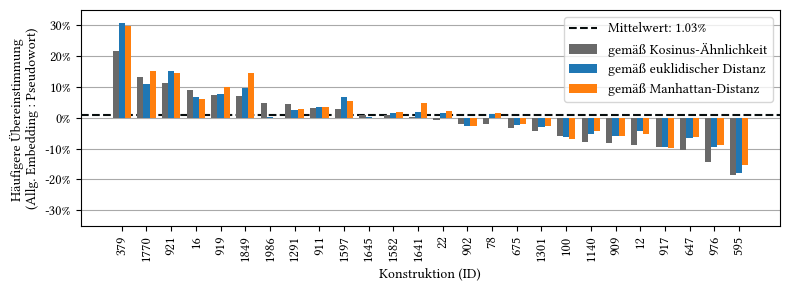

In [8]:
constr_avg_sims = sims_single.groupby('constr')["sim_diff"].mean()
constr_avg_euclidean = sims_single.groupby('constr')["euclidean_diff"].mean()
constr_avg_manhattan = sims_single.groupby('constr')["manhattan_diff"].mean()

constr_avg_sims = constr_avg_sims.sort_values(ascending=False)
constr_strings = [str(i) for i in list(constr_avg_sims.index)]

plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(8, 3))

# Plot the grouped bars
bar_width = 0.25
bar_positions_sims = np.arange(len(constr_strings))
bar_positions_euclidean = bar_positions_sims + bar_width
bar_positions_manhattan = bar_positions_sims + 2 * bar_width

ax.bar(bar_positions_sims, constr_avg_sims.values, color='dimgrey', width=bar_width, zorder=4)
ax.bar(bar_positions_euclidean, constr_avg_euclidean[constr_avg_sims.index], color='tab:blue', width=bar_width, zorder=4)
ax.bar(bar_positions_manhattan, constr_avg_manhattan[constr_avg_sims.index], color='tab:orange', width=bar_width, zorder=4)

plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

overall_avg = sims_single[['sim_diff', 'euclidean_diff', 'manhattan_diff']].mean().mean()
ax.axhline(overall_avg, color='xkcd:almost black', linestyle='--', zorder=3)

ax.legend(labels=[f'Mittelwert: {overall_avg:.2%}', 'gemäß Kosinus-Ähnlichkeit', 'gemäß euklidischer Distanz', 'gemäß Manhattan-Distanz'])

plt.ylim(-0.35, 0.35)
plt.xlabel('Konstruktion (ID)')
plt.ylabel('Häufigere Übereinstimmung \n(Allg. Embedding : Pseudowort)')

plt.xticks(bar_positions_sims + bar_width, constr_strings, rotation=90)

plt.tight_layout()

plt.savefig('ratio_single_in_matches.pdf')
plt.show()

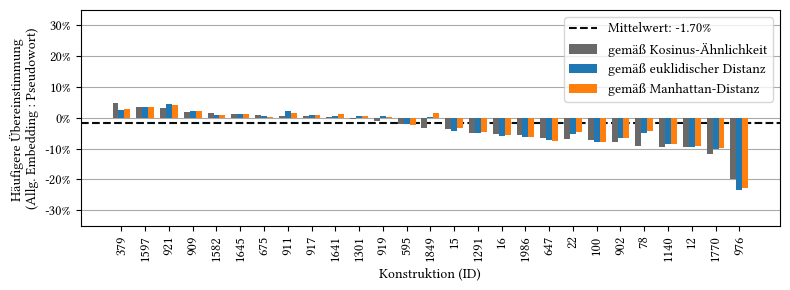

In [9]:
constr_avg_sims = sims_ex.groupby('constr')["sim_diff"].mean()
constr_avg_euclidean = sims_ex.groupby('constr')["euclidean_diff"].mean()
constr_avg_manhattan = sims_ex.groupby('constr')["manhattan_diff"].mean()

constr_avg_sims = constr_avg_sims.sort_values(ascending=False)
constr_strings = [str(i) for i in list(constr_avg_sims.index)]

plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(8, 3))

# Plot the grouped bars
bar_width = 0.25
bar_positions_sims = np.arange(len(constr_strings))
bar_positions_euclidean = bar_positions_sims + bar_width
bar_positions_manhattan = bar_positions_sims + 2 * bar_width

ax.bar(bar_positions_sims, constr_avg_sims.values, color='dimgrey', width=bar_width, zorder=4)
ax.bar(bar_positions_euclidean, constr_avg_euclidean[constr_avg_sims.index], color='tab:blue', width=bar_width, zorder=4)
ax.bar(bar_positions_manhattan, constr_avg_manhattan[constr_avg_sims.index], color='tab:orange', width=bar_width, zorder=4)

plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

overall_avg = sims_ex[['sim_diff', 'euclidean_diff', 'manhattan_diff']].mean() .mean()
ax.axhline(overall_avg, color='xkcd:almost black', linestyle='--', zorder=3)

ax.legend(labels=[f'Mittelwert: {overall_avg:.2%}', 'gemäß Kosinus-Ähnlichkeit', 'gemäß euklidischer Distanz', 'gemäß Manhattan-Distanz'])

plt.ylim(-0.35, 0.35)
plt.xlabel('Konstruktion (ID)')
plt.ylabel('Häufigere Übereinstimmung \n(Allg. Embedding : Pseudowort)')

plt.xticks(bar_positions_sims + bar_width, constr_strings, rotation=90)

plt.tight_layout()

plt.savefig('ratio_ex_in_matches.pdf')
plt.show()